# This Script Contains the Following:
    1. Import Libraries & Data
    2. Data Checks
    3. Create Subset with Relevant Columns
    4. Create Correlation Matrix Heatmap
    5. Create Scatterplot
    6. Create Pair Plot
    7. Create categorical plot

### 1. Import Libraries & Data

In [3]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Check Version
matplotlib.__version__

'3.8.4'

In [5]:
# Define Path
Path = 'C:\\Users\\cschw\\OneDrive\\Desktop\\MLB Project'

In [6]:
# Import Data
mlbdf = pd.read_csv(os.path.join(Path, 'Data Sets', 'Main Data Set', 'MLB Data One Tab.csv'))

### 2. Data Checks

In [8]:
# Shape
mlbdf.shape

(300, 93)

In [9]:
# Check head
mlbdf.head()

,Year,Team,W,L,W-L%,R,RA,Rdiff,Home Wins,Home Losses,...,Avg Game Time Min,City,State,League,Division,Region,All Star Rating,All Star Viewers,World Series Rating,World Series Viewers
0,2024,Arizona Diamondbacks,77,60,0.562,5.4,4.7,0.7,39,30,...,163,Phoenix,Arizona,National,West,West,3.8,6123000.0,NaN,NaN
1,2024,Atlanta Braves,74,63,0.540,4.3,3.9,0.4,36,28,...,155,Atlanta,Georgia,National,East,South,3.8,6123000.0,NaN,NaN
2,2024,Baltimore Orioles,79,59,0.572,5.0,4.3,0.6,39,30,...,162,Baltimore,Maryland,American,East,South,3.8,6123000.0,NaN,NaN
3,2024,Boston Red Sox,70,67,0.511,4.8,4.7,0.1,31,38,...,162,Boston,Massachusetts,American,East,Northeast,3.8,6123000.0,NaN,NaN
4,2024,Chicago Cubs,71,66,0.518,4.6,4.2,0.4,36,29,...,158,Chicago,Illinois,National,Central,Midwest,3.8,6123000.0,NaN,NaN


In [10]:
# Check Data types
for column in mlbdf.columns:
    print(f'{column}: {mlbdf[column].dtype}')


Year: int64
Team: object
W: int64
L: int64
W-L%: float64
R: float64
RA: float64
Rdiff: float64
Home Wins: int64
Home Losses: int64
Road Wins: int64
Road Losses: int64
# of Batters: int64
Avg Bat Age: float64
R/G: float64
G: int64
PA: int64
AB: int64
TR: int64
H: int64
2B: int64
3B: int64
HR: int64
RBI: int64
SB: int64
CS: int64
BB: int64
SO: int64
BA: float64
OBP: float64
SLG: float64
OPS: float64
OPS+: int64
TB: int64
GDP: int64
HBP: int64
SH: int64
SF: int64
IBB: int64
LOB: int64
#P: int64
Avg Pitcher Age: float64
RA/G: float64
PW: int64
PL: int64
PW-L%: float64
ERA: float64
G.1: int64
GS: int64
GF: int64
CG: int64
tSho: int64
cSho: int64
SV: int64
IP: float64
HA: int64
TRA: int64
ER: int64
HRA: int64
PBB: int64
PIBB: int64
PSO: int64
PHBP: int64
BK: int64
WP: int64
BF: int64
ERA+: int64
FIP: float64
WHIP: float64
H9: float64
HR9: float64
BB9: float64
SO9: float64
SO/W: float64
OLOB: int64
Attendance: float64
Attend/G: float64
BPF: int64
PPF: int64
# of All Stars: int64
Cumulative # 

In [11]:
#Changing data to proper types
mlbdf['Attendance'] = pd.to_numeric(mlbdf['Attendance'], errors='coerce')
mlbdf['Attend/G'] = pd.to_numeric(mlbdf['Attend/G'], errors='coerce')
mlbdf['Est. Payroll'] = pd.to_numeric(mlbdf['Est. Payroll'], errors='coerce')

In [12]:
# Check types again
for column in mlbdf.columns:
    print(f'{column}: {mlbdf[column].dtype}')

Year: int64
Team: object
W: int64
L: int64
W-L%: float64
R: float64
RA: float64
Rdiff: float64
Home Wins: int64
Home Losses: int64
Road Wins: int64
Road Losses: int64
# of Batters: int64
Avg Bat Age: float64
R/G: float64
G: int64
PA: int64
AB: int64
TR: int64
H: int64
2B: int64
3B: int64
HR: int64
RBI: int64
SB: int64
CS: int64
BB: int64
SO: int64
BA: float64
OBP: float64
SLG: float64
OPS: float64
OPS+: int64
TB: int64
GDP: int64
HBP: int64
SH: int64
SF: int64
IBB: int64
LOB: int64
#P: int64
Avg Pitcher Age: float64
RA/G: float64
PW: int64
PL: int64
PW-L%: float64
ERA: float64
G.1: int64
GS: int64
GF: int64
CG: int64
tSho: int64
cSho: int64
SV: int64
IP: float64
HA: int64
TRA: int64
ER: int64
HRA: int64
PBB: int64
PIBB: int64
PSO: int64
PHBP: int64
BK: int64
WP: int64
BF: int64
ERA+: int64
FIP: float64
WHIP: float64
H9: float64
HR9: float64
BB9: float64
SO9: float64
SO/W: float64
OLOB: int64
Attendance: float64
Attend/G: float64
BPF: int64
PPF: int64
# of All Stars: int64
Cumulative # 

In [13]:
# Check for missing values
mlbdf.isnull().sum()

Year                     0
Team                     0
W                        0
L                        0
W-L%                     0
                        ..
Region                   0
All Star Rating         30
All Star Viewers        30
World Series Rating     30
World Series Viewers    30
Length: 93, dtype: int64

There are missing values but they were expected - they are for 2020 during the pandemic and 2024 for an event that has not happened yet.

In [15]:
# Check for duplicates

df_dups = mlbdf[mlbdf.duplicated()]

In [16]:
df_dups.shape

(0, 93)

### 3. Create subset with relevant columns for analysis

In [18]:
#Create subset with relevant columns

mlbsub = mlbdf[['Year', 'W', 'L', 'W-L%', 'Home Wins', 'Home Losses', 'R/G', 'TR', 'HR', 'SB', 'ERA', 'TRA', 'Attendance', 'Attend/G', 'Avg Game Time Min']]

# Exclude rows where 'Year' is 2020 - there are no attendance figures because of the Covid-19 Pandemic
mlbsub = mlbsub[~mlbsub['Year'].isin([2020])]

In [19]:
# Check head of subset
mlbsub.head()

,Year,W,L,W-L%,Home Wins,Home Losses,R/G,TR,HR,SB,ERA,TRA,Attendance,Attend/G,Avg Game Time Min
0,2024,77,60,0.562,39,30,5.42,743,172,94,4.47,646,1947852.0,28230.0,163
1,2024,74,63,0.540,36,28,4.30,589,180,55,3.62,528,2407558.0,37618.0,155
2,2024,79,59,0.572,39,30,4.96,684,206,84,3.94,597,1934738.0,28040.0,162
3,2024,70,67,0.511,31,38,4.80,658,172,124,4.12,650,2271388.0,32919.0,162
4,2024,71,66,0.518,36,29,4.57,626,145,126,3.79,574,2367723.0,36427.0,158


### 4. Create Correlation Matrix Heatmap

In [21]:
# Create correlation matrix
mlbsub.corr()

,Year,W,L,W-L%,Home Wins,Home Losses,R/G,TR,HR,SB,ERA,TRA,Attendance,Attend/G,Avg Game Time Min
Year,1.000000,-0.152938,-0.153107,0.000005,-0.194062,-0.086583,0.026386,-0.190978,-0.079541,0.218894,0.018142,-0.171919,-0.216118,-0.130010,-0.543942
W,-0.152938,1.000000,-0.832882,0.956173,0.907862,-0.776352,0.688532,0.731077,0.551891,-0.038424,-0.743146,-0.575845,0.481904,0.439475,0.275463
L,-0.153107,-0.832882,1.000000,-0.956331,-0.726527,0.901965,-0.656975,-0.467996,-0.375952,-0.055485,0.777246,0.811963,-0.419045,-0.468552,0.100640
W-L%,0.000005,0.956173,-0.956331,1.000000,0.852237,-0.876403,0.706041,0.627420,0.484133,0.010342,-0.791932,-0.722064,0.470761,0.475962,0.091697
Home Wins,-0.194062,0.907862,-0.726527,0.852237,1.000000,-0.853822,0.591560,0.655258,0.499551,-0.078749,-0.668731,-0.511620,0.456871,0.409103,0.293921
Home Losses,-0.086583,-0.776352,0.901965,-0.876403,-0.853822,1.000000,-0.582974,-0.431115,-0.351941,0.003944,0.715985,0.743246,-0.409454,-0.450145,0.051524
R/G,0.026386,0.688532,-0.656975,0.706041,0.591560,-0.582974,1.000000,0.912925,0.737840,0.019203,-0.256071,-0.207739,0.410393,0.406765,0.178244
TR,-0.190978,0.731077,-0.467996,0.627420,0.655258,-0.431115,0.912925,1.000000,0.784598,-0.048834,-0.204274,-0.019480,0.410137,0.341167,0.422539
HR,-0.079541,0.551891,-0.375952,0.484133,0.499551,-0.351941,0.737840,0.784598,1.000000,-0.149811,-0.131407,-0.002875,0.327467,0.281459,0.330036
SB,0.218894,-0.038424,-0.055485,0.010342,-0.078749,0.003944,0.019203,-0.048834,-0.149811,1.000000,-0.030886,-0.084078,-0.073764,-0.053175,-0.340870


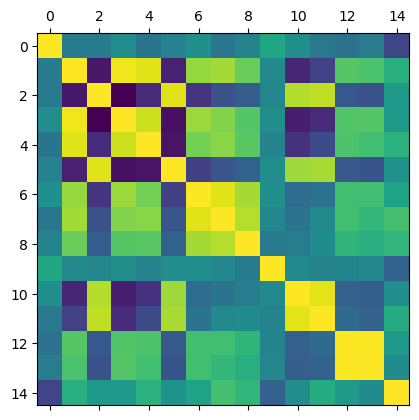

In [22]:
# Create a correlation heatmap using matplotlib

plt.matshow(mlbsub.corr())
plt.show()

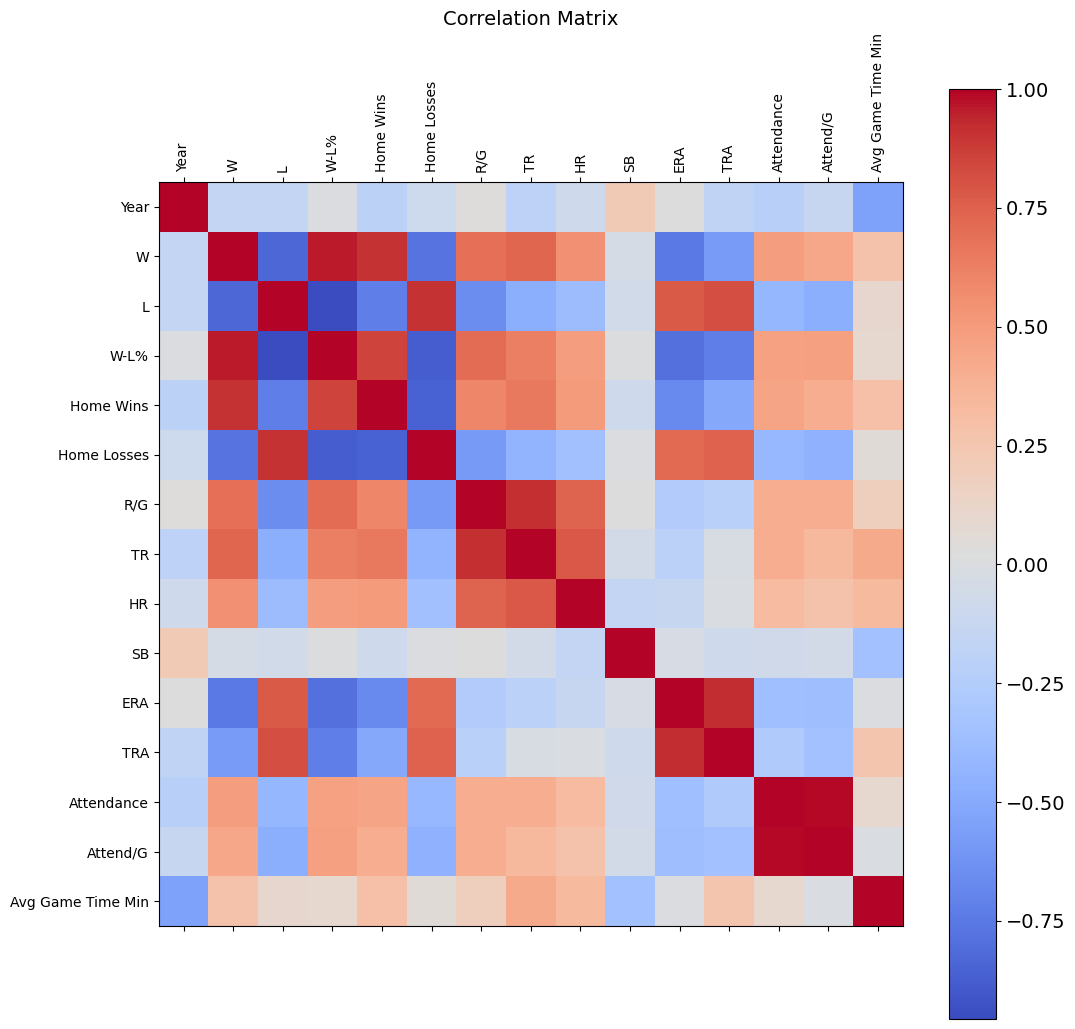

<Figure size 640x480 with 0 Axes>

In [23]:
# Create and adjust labels, adjust axes, adjust color scheme

f = plt.figure(figsize=(12, 12))  # increase figure size if needed
plt.matshow(mlbsub.corr(), cmap='coolwarm', fignum=f.number)  # type of plot

# x axis labels with 90 degrees rotation to avoid overlap
plt.xticks(range(mlbsub.shape[1]), mlbsub.columns, fontsize=10, rotation=90, ha='center')

# y axis labels with vertical alignment
plt.yticks(range(mlbsub.shape[1]), mlbsub.columns, fontsize=10)

# add a colour legend (called colorbar)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)  # add font size

plt.title('Correlation Matrix', fontsize=14)  # add title

# adjust layout to prevent overlap
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)  # manual adjustment if needed
plt.show()

corr_file = 'correlation_matrix1.png'
corr_path = Path + '/' + corr_file
plt.savefig(corr_path, bbox_inches='tight')


The correlation matrix shows about what I expected. There is a a modest positive coorelation between runs per game/total runs and wins/win-loss percentage. Similarly, there is a modest coorelation between Home Runs and Wins - which makes sense. Conversely, with ERA, a statistic that measures a pitcher's ability to limit opposing runs, there is a negative coorelation with home wins - in other words, teams that struggle with pitching struggle to win games. In terms of attendance, there is a weak positive coorelation between attendance and positive offensive statistics. Teams that win more have higher attendance, teams that lose more have lower attendance. However, this is a relatively weak positive coorelation. This will require more analysis. Unexpectedly, there is actually a positive correlation between time of game and attendance. There was higher attendance at longer games. However, the changes to the rules to shorten the game came after then Covid-19 pandemic. Attendance may have dropped after the pandemic because of people's reluctance to attend public events. So the decrease in attendance could be due to that, and unrelated to the decrease in average game time. There is a fairly strong negative correlation between Year and Game Time. Games lasted a significantly shorter duration in '23 and '24 (as shown in next graph) than in previous years.

### 5. Create Scatterplots

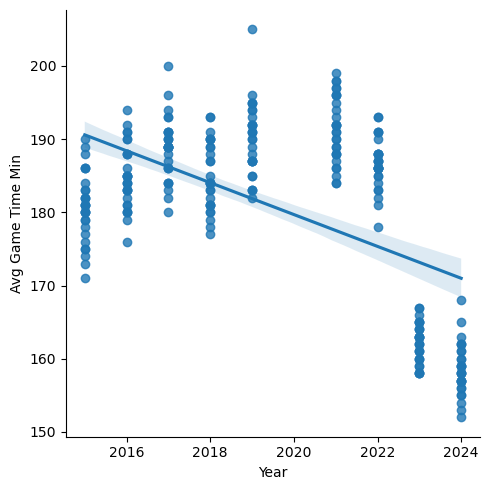

In [26]:
# Create a scatterplot of Year and Avg Game Time

sns.lmplot(x='Year', y='Avg Game Time Min', data=mlbsub).savefig(f"{Path}/year_time_scatter.png")

This scatterplot shows that in the last two seasons time of game has decreased significantly, suggesting that the rules changes have impacted the duration of games. 

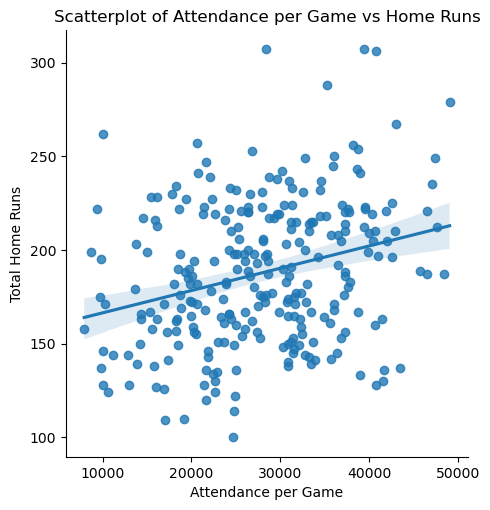

In [28]:

# Create the scatterplot
sns.lmplot(x='Attend/G', y='HR', data=mlbsub)

# Add titles and labels
plt.title('Scatterplot of Attendance per Game vs Home Runs')
plt.xlabel('Attendance per Game')
plt.ylabel('Total Home Runs')

# Save the plot to your specific path
plt.savefig("C:/Users/cschw/OneDrive/Desktop/MLB Project/Visualizations/attendance_hr_scatter.png")

# Show the plot (optional)
plt.show()


There's a general trend in the scatterplot that teams wthat hit more home runs have higher attendance, however it is a weak relationship with many outliers. 

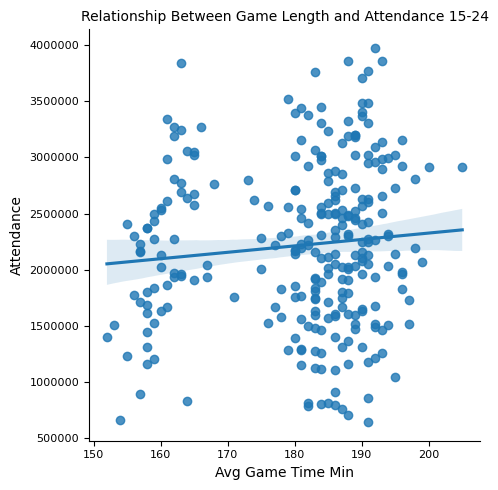

In [30]:
# Create a scatter plot of Attendance and Avg Game Time Min without scientific notation
plot = sns.lmplot(x='Avg Game Time Min', y='Attendance', data=mlbsub)

# Add a title with a smaller font size
plt.title("Relationship Between Game Length and Attendance 15-24", fontsize=10)

# Disable scientific notation on both axes
plt.ticklabel_format(style='plain', axis='both')

# Adjust the font size for the y-axis and x-axis ticks
plt.tick_params(axis='y', labelsize=8)
plt.tick_params(axis='x', labelsize=8)

# Adjust the layout to prevent labels from getting cut off
plt.tight_layout()

# Save the plot
plot.savefig(f"{Path}/attendance_time_scatter.png")

There is a weak positive correlation between attendance and time of game. MLB hoped that shorter games would increase attendance. This data seems to suggest otherwise. However, the seasons impacted by the rules changes have occured immediately after the Covid-19 pandemic, which could be a significant confounding variable in attendance figures. 

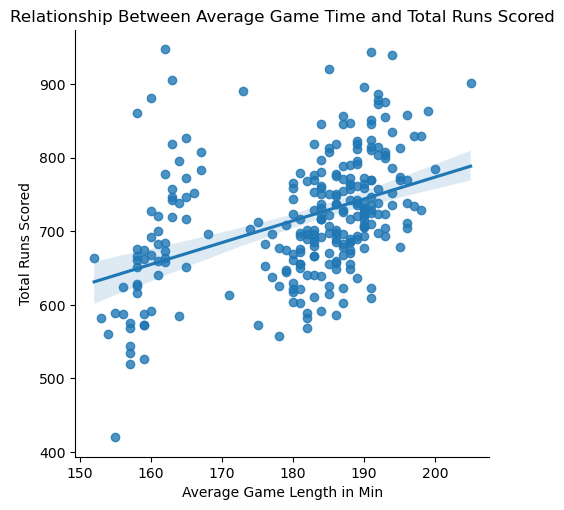

In [32]:
# Create a scatterplot of average game time and total runs
sns.lmplot(x='Avg Game Time Min', y='TR', data=mlbsub)

# Add title and axis labels
plt.title('Relationship Between Average Game Time and Total Runs Scored')
plt.xlabel('Average Game Length in Min')
plt.ylabel('Total Runs Scored')

# Save the plot
plt.savefig(f"{Path}/runs_time_scatter.png")

plt.show()

There seems to be a correlation between average game time and total runs scored. The longer the game lasts the more runs are scored. With shorter games, there will likely be fewer runs based on this model. However, fans are attracted to both shorter games (theoretically) as well as high scoring games, so it will be important to analyze these variables against each other. 

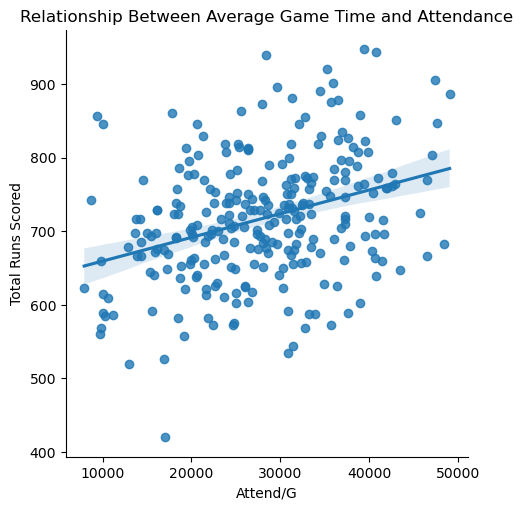

In [34]:
# Create a scatterplot of average game time and total runs
sns.lmplot(x='Attend/G', y='TR', data=mlbsub)

# Add title and axis labels
plt.title('Relationship Between Average Game Time and Attendance')
plt.xlabel('Attend/G')
plt.ylabel('Total Runs Scored')

# Save the plot
plt.savefig(f"{Path}/attendance_runs_scatter.png")

plt.show()

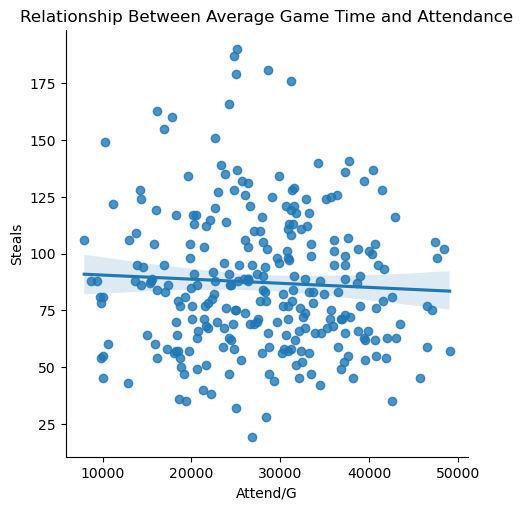

In [35]:
# Create a scatterplot of attendance and steals
sns.lmplot(x='Attend/G', y='SB', data=mlbsub)

# Add title and axis labels
plt.title('Relationship Between Average Game Time and Attendance')
plt.xlabel('Attend/G')
plt.ylabel('Steals')

# Save the plot
plt.savefig(f"{Path}/attendance_steals_scatter.png")

plt.show()

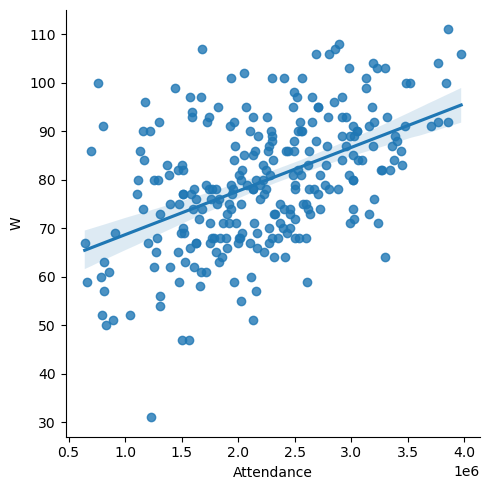

In [36]:
# Create a scatterplot of attendance and wins

sns.lmplot(x = 'Attendance', y = 'W', data = mlbsub).savefig(f"{Path}/attendance_wins_scatter.png")

There is a fairly strong coorelation between wins and attendance. Teams that are succeding draw larger crowds. From a business perspective, this is hard to control or improve upon because naturally some teams will win more and some will lose more. However, a competitive league where there is parity in a team's chance to win could relate to attendance figures. 

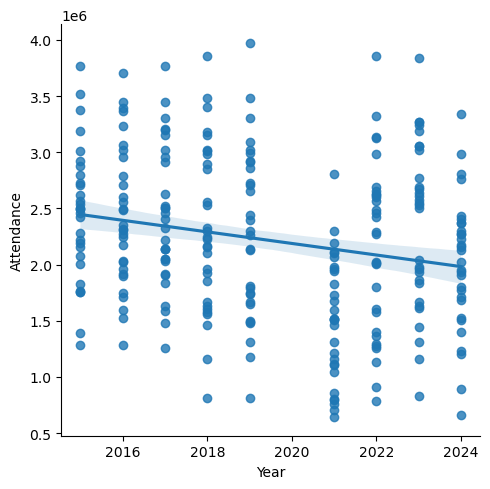

In [38]:
sns.lmplot(x = 'Year', y = 'Attendance', data = mlbsub).savefig(f"{Path}/year_attendance_scatter.png")

There has been a general decline in attendance over the last 10 years. This was expected. The scatterplot confirms that expectation. 

### 6. Create Pair Plots

In [41]:
# Create smaller subset 

mlbsub2 = mlbsub[['Year', 'TR', 'Home Wins', 'Home Losses', 'Attendance', 'Attend/G', 'Avg Game Time Min']]

C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

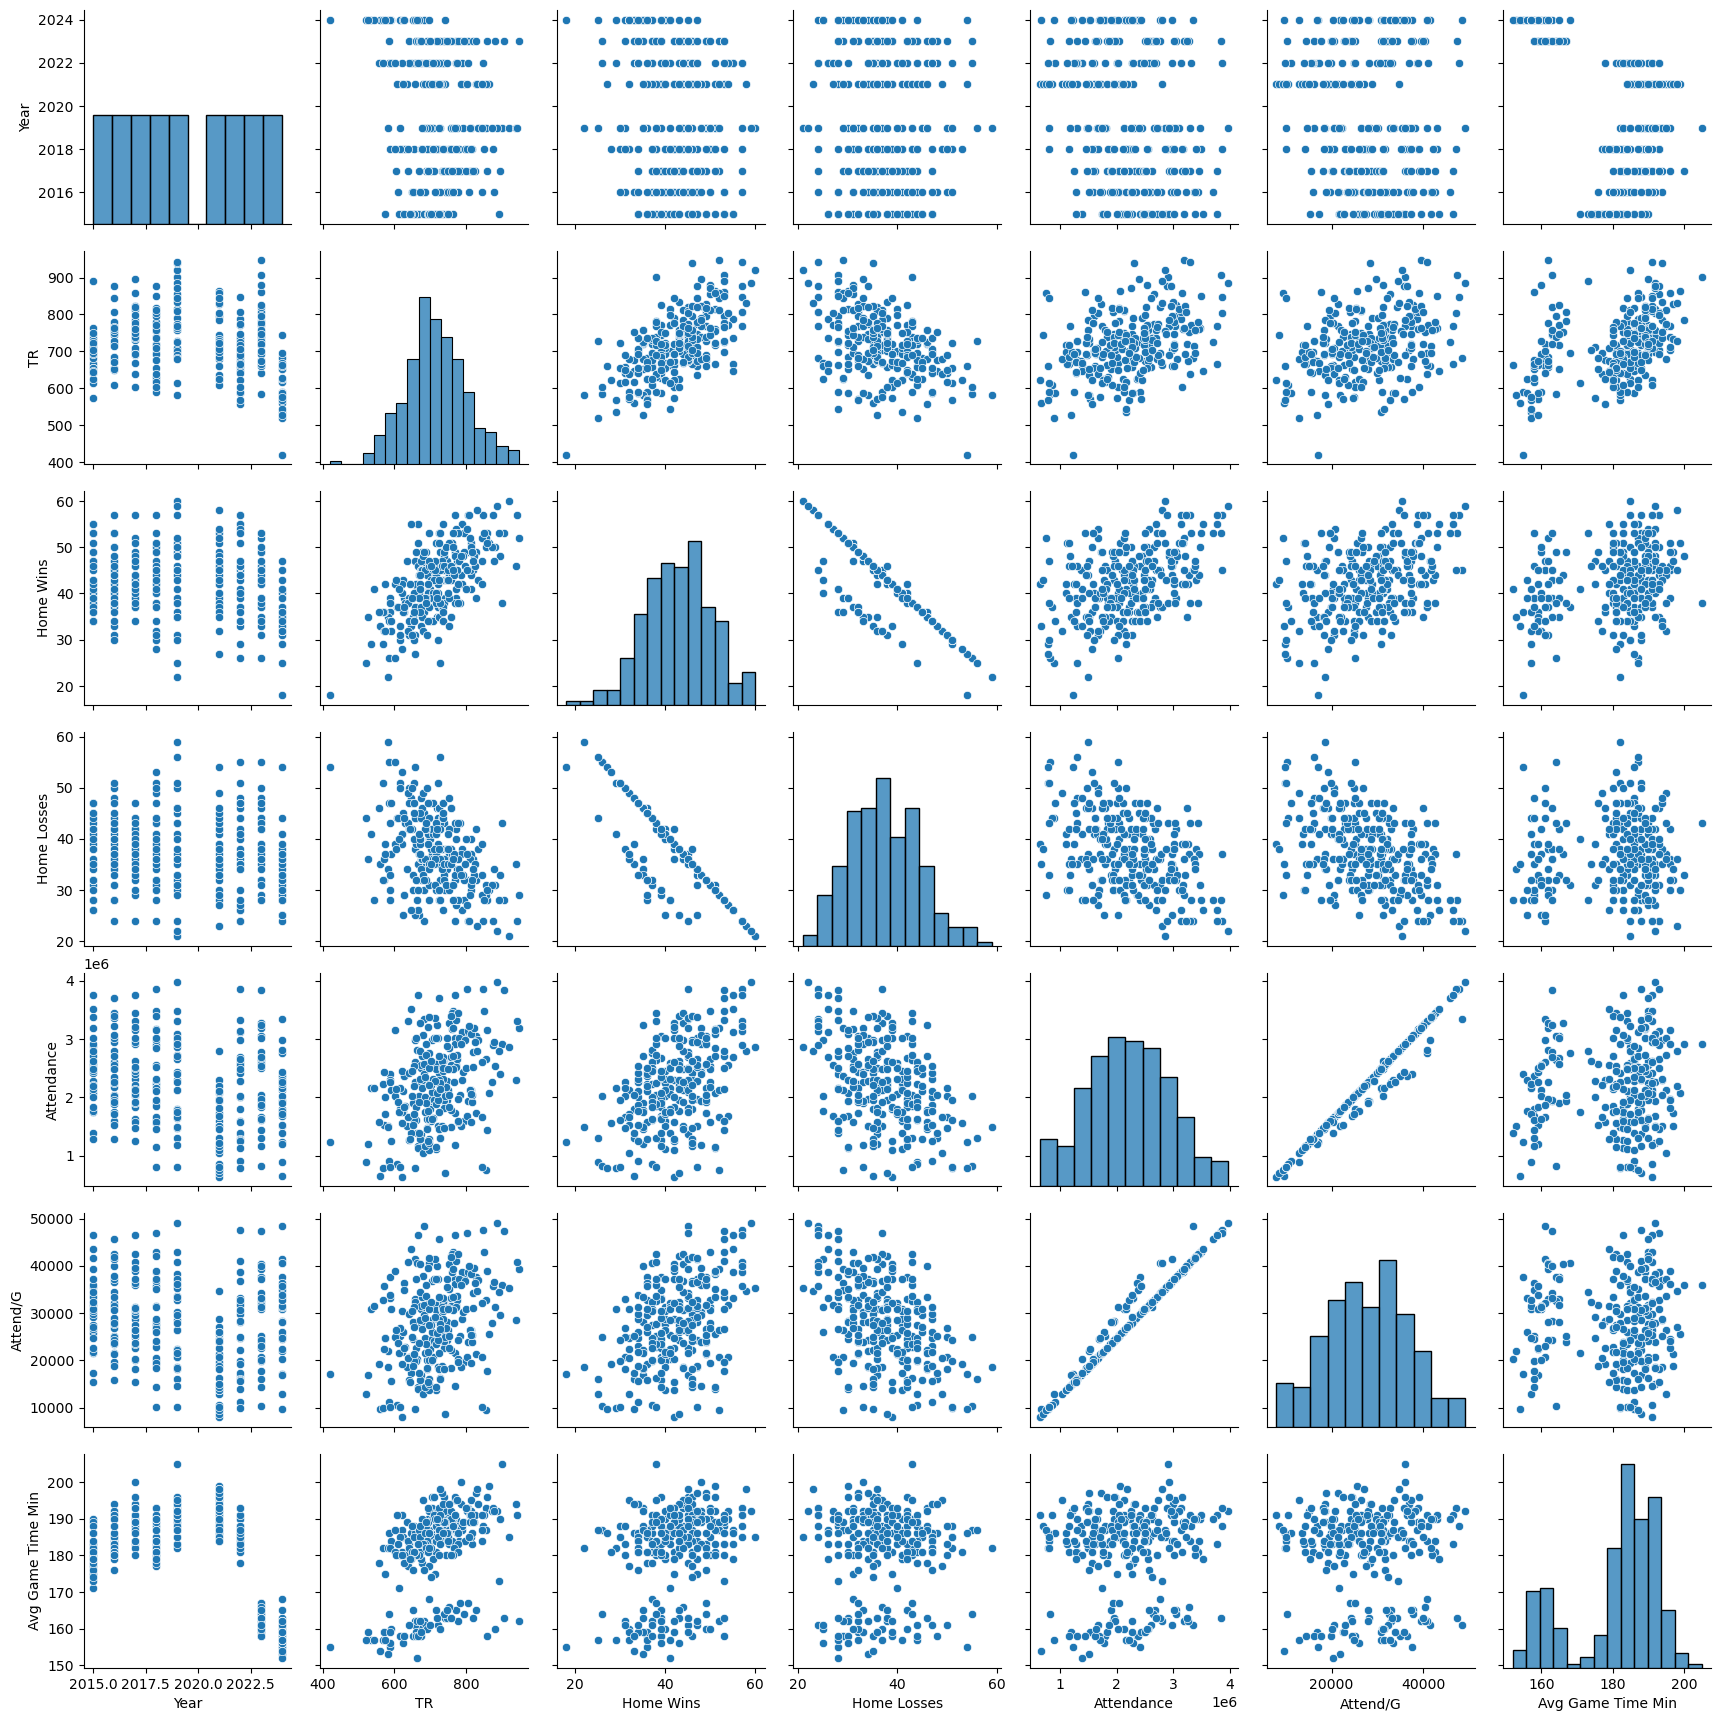

In [42]:
g = sns.pairplot(mlbsub2)

The pair plots are consistent with the scatter plots. I need to further investigate the relationship between time of game and attendance. That is a key part of this analysis, however the pandemic is likely a confounding factor in attendace. They seem to be unrelated but there is limited data to work with. I would also like to conduct further analysis on the relationship between runs, game time and attendance. The strongest relationships seems to be between attendance and wins/losses.

### 7. Create a Categorical Plot

C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


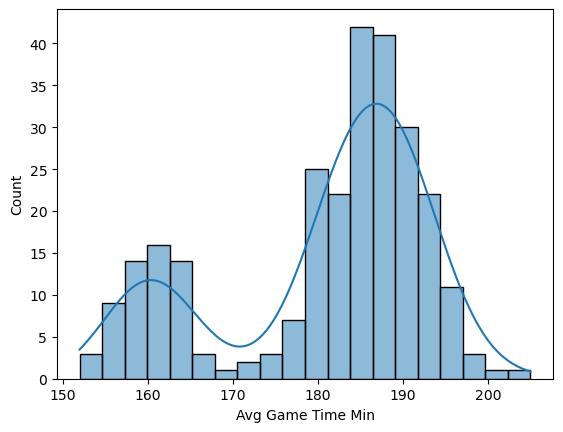

In [45]:
# Create histogram of attendance figures

sns.histplot(mlbsub2['Avg Game Time Min'], bins = 20, kde = True)
plt.savefig(f'{Path}/time_histogram.png')

In [46]:
# Create short game time category
mlbsub2.loc[mlbsub2['Avg Game Time Min'] < 170, 'Time Category'] = 'Short Game'

C:\Users\cschw\AppData\Local\Temp\ipykernel_42584\867953799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlbsub2.loc[mlbsub2['Avg Game Time Min'] < 170, 'Time Category'] = 'Short Game'


In [47]:
# Create medium game time category
mlbsub2.loc[(mlbsub2['Avg Game Time Min'] >= 170) & (mlbsub2['Avg Game Time Min'] < 190), 'Time Category'] = 'Medium Game'

In [48]:
#Create long game time category'
mlbsub2.loc[mlbsub2['Avg Game Time Min'] >= 190, 'Time Category'] = 'Long Game'

In [49]:
# check values
mlbsub2['Time Category'].value_counts(dropna = False)

Time Category
Medium Game    142
Long Game       68
Short Game      60
Name: count, dtype: int64

C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cschw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


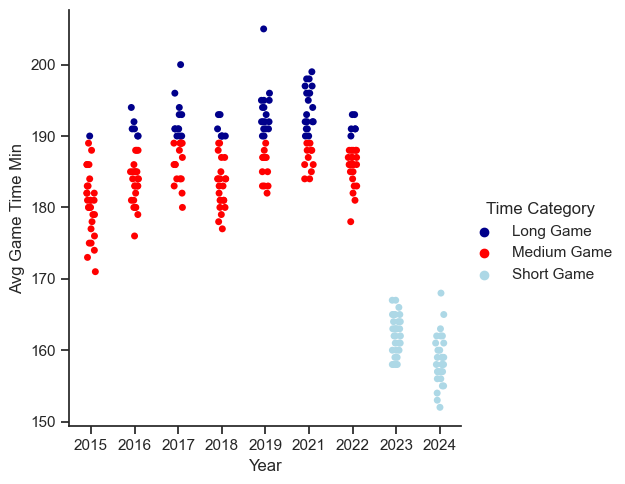

In [50]:
# Create categorical plot with time categories
sns.set(style="ticks")
g = sns.catplot(x="Year", y="Avg Game Time Min", hue="Time Category", 
                data=mlbsub2, palette=["darkblue", "red", "lightblue"])
plt.savefig(f'{Path}/time_category_histo.png')

I made the categories into three 20 minute increments. Interestingly, all the games that qualify as "Short" are from the 2023 and 2024 seasons, after the rule change took affect. All of the games classified as medium or long took place before the rule changes. 
This shows that the rule changes are decreasing the lengths of games succesfully - at least according to this data.

### Export CSV

In [53]:
mlbdf.to_csv(r'C:\Users\cschw\OneDrive\Desktop\MLB Project\MLB Data 9-12 Update.csv', index=False)